**Name:-Gaurav Pandey**

Predict the percentage of an student based on the no. of study hours.

In [19]:
import io
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

In [2]:
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
s=requests.get(url).content
data=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
len(data)

25

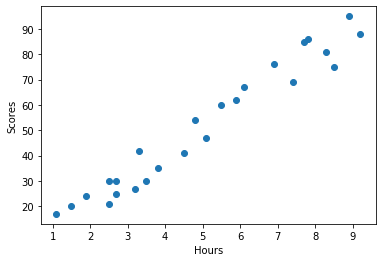

In [15]:
plt.scatter(data['Hours'], data['Scores']) 
plt.xlabel("Hours") 
plt.ylabel("Scores") 
plt.show()

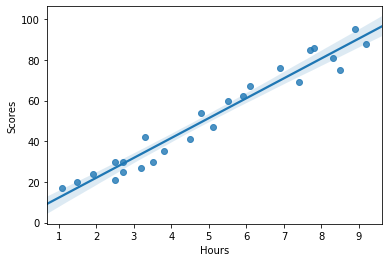

In [16]:
sns.regplot(x="Hours", y="Scores", data=data);

Here,We can see the positive co-relation between Hours and Scores

# Make a linear regresstion model

In [41]:
X_train, X_test, y_train, y_test = train_test_split(data['Hours'], data['Scores'], test_size=0.2, random_state=42) 

In [42]:
X_train=X_train.values.reshape(-1, 1)
X_test=X_test.values.reshape(-1, 1)


In [43]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Validating by Mean Absolute error

In [44]:
mae_train= mean_absolute_error(model.predict(X_train), y_train)
mae_test= mean_absolute_error(model.predict(X_test), y_test)
print("Mean Absolute error:Train - ",mae_train)
print("Mean Absolute error:Test - ",mae_test)

Mean Absolute error:Train -  5.221357478352559
Mean Absolute error:Test -  3.9207511902099244


In [48]:
model.predict(data['Hours'].values.reshape(-1,1))

array([27.03208774, 52.20549094, 33.80954245, 85.12455667, 36.71416589,
       17.35000959, 91.90201137, 56.0783222 , 83.18814104, 28.96850337,
       77.37889414, 59.95115347, 46.39624405, 34.77775026, 13.47717832,
       88.99738793, 27.03208774, 21.22284085, 61.8875691 , 74.4742707 ,
       28.96850337, 49.3008675 , 39.61878934, 69.63323162, 78.34710196])

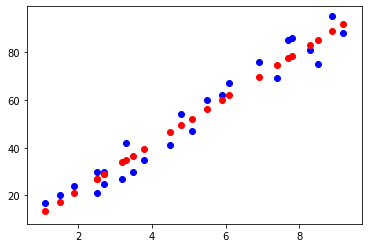

In [46]:
import scipy, pylab
ax = pylab.subplot(111)
ax.scatter(data['Hours'],data['Scores'] , c='b')
ax.scatter(data['Hours'],model.predict(data['Hours'].values.reshape(-1,1)), c='r')
ax.figure.show()

Q- What will be predicted score if a student studies for 9.25 hrs/ day?

In [54]:
model.predict([[9.25]])

array([92.38611528])